<h1>Employee Attrition Classification</h1>

<p>The Synthetic Employee Attrition Dataset is a simulated dataset designed for the analysis and prediction of employee attrition. It contains detailed information about various aspects of an employee's profile, including demographics, job-related features, and personal circumstances.

The dataset comprises 74,498 samples, split into training and testing sets to facilitate model development and evaluation. Each record includes a unique Employee ID and features that influence employee attrition. The goal is to understand the factors contributing to attrition and develop predictive models to identify at-risk employees.

This dataset is ideal for HR analytics, machine learning model development, and demonstrating advanced data analysis techniques. It provides a comprehensive and realistic view of the factors affecting employee retention, making it a valuable resource for researchers and practitioners in the field of human resources and organizational development.</p>

<h2>1.Training Datasets</h2>

In [91]:
import employee_attrition_classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

const = employee_attrition_classification.base()
data = const.train_data()
data2 = const.test_data()
train_data = data.drop(columns=['attrition'])
train_label = data['attrition']
test_data = data2.drop(columns=['attrition'])
test_label = data2['attrition']

train_dummy = const.train_data_dummy()
train_dummy_data = train_dummy[0]
train_dummy_label = train_dummy[1]
test_dummy = const.test_data_dummy()
test_dummy_data = test_dummy[0]
test_dummy_label = test_dummy[1]
train_dummy[0]

,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,company_tenure,gender_Female,gender_Male,...,innovation_opportunities_No,innovation_opportunities_Yes,company_reputation_Excellent,company_reputation_Fair,company_reputation_Good,company_reputation_Poor,employee_recognition_High,employee_recognition_Low,employee_recognition_Medium,employee_recognition_Very High
0,8410,31,19,5390,2,22,0,89,False,True,...,True,False,True,False,False,False,False,False,True,False
1,64756,59,4,5534,3,21,3,21,True,False,...,True,False,False,True,False,False,False,True,False,False
2,30257,24,10,8159,0,11,3,74,True,False,...,True,False,False,False,False,True,False,True,False,False
3,65791,36,7,3989,1,27,2,50,True,False,...,True,False,False,False,True,False,False,False,True,False
4,65026,56,41,4821,0,71,0,68,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,12,4414,1,66,2,35,True,False,...,False,True,False,False,False,True,False,False,False,True
59594,6266,18,4,8040,3,42,0,73,False,True,...,True,False,False,True,False,False,False,False,True,False
59595,54887,22,14,7944,0,34,2,29,True,False,...,True,False,False,False,True,False,False,False,True,False
59596,861,23,8,2931,0,62,0,9,False,True,...,True,False,False,False,True,False,False,True,False,False


<h2>2.Model Training</h2>

<h3>1) Logistic Regression</h3>

In [3]:

model = LogisticRegression(solver='saga',max_iter=50000)
#scaler = MinMaxScaler(copy=True,feature_range=(0,1))
#scaler = StandardScaler()
#scaler.fit(train_data)
##test_scaled = scaler.transform(test_data)
#pca = PCA(n_components=20)
#pca.fit(train_scaled)
#X_pca = pca.transform(train_data)
#pca.fit(test_scaled)
#test_pca = pca.transform(test_data)

#model.fit(train_scaled,train_label)
model.fit(train_data,train_label)

test_data = data2.drop(columns=['attrition'])
test_label = data2['attrition']

print("Test score: {:2f}".format(model.score(test_data,test_label)))


Test score: 0.682685


<h3>2) SVC</h3>

In [21]:
svc_model = SVC()
#scaler = MinMaxScaler()
svc_model.fit(train_data,train_label)
print("Test score:{:2f}".format(svc_model.score(test_data,test_label)))


Test score:0.528054


<h3>3) Decision Tree</h3>

In [7]:
tree_model = DecisionTreeClassifier(max_depth=100)
tree_model.fit(train_data,train_label)
print("Test score:{:2f}".format(tree_model.score(test_data,test_label)))

Test score:0.666913


<h3>3)-1 Decision Tree with dummy_data</h3>
<p>scikit-learn, Decision Tree does not handle categorical data so replace categrical with dummy_data</p>

In [10]:
tree_model.fit(train_dummy_data,train_dummy_label)
print("Test score:{:2f}".format(tree_model.score(test_dummy_data,test_dummy_label)))

Test score:0.668859


<h3>4) Neural Network</h3>

In [72]:
neuro_model = MLPClassifier(solver='adam',random_state=42,max_iter=100000)
neuro_model.fit(train_data,train_label)
print("Test score: {:2f}".format(neuro_model.score(test_data,test_label)))

Test score: 0.625705


<h3>5) GradientBoostingClassifier</h3>

<h3>5)-1 GradientBoostingClassifier</h3>

In [73]:
gbrt_model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=500,max_depth=4,random_state=0)
gbrt_model.fit(train_data,train_label)
print("Test score: {:2f}".format(gbrt_model.score(test_data,test_label)))

Test score: 0.759329


<h3>5)-2 HistGradientBoostingClassifier</h3>

In [51]:
hgbrt_model = HistGradientBoostingClassifier(learning_rate=0.1,max_iter=100,max_depth=4)
hgbrt_model.fit(train_data,train_label)

print("Test score: {:2f}".format(hgbrt_model.score(test_data,test_label)))

Test score: 0.760872


<h3>5)-3 GradientBoostingClassifier Feature Importance</h3>

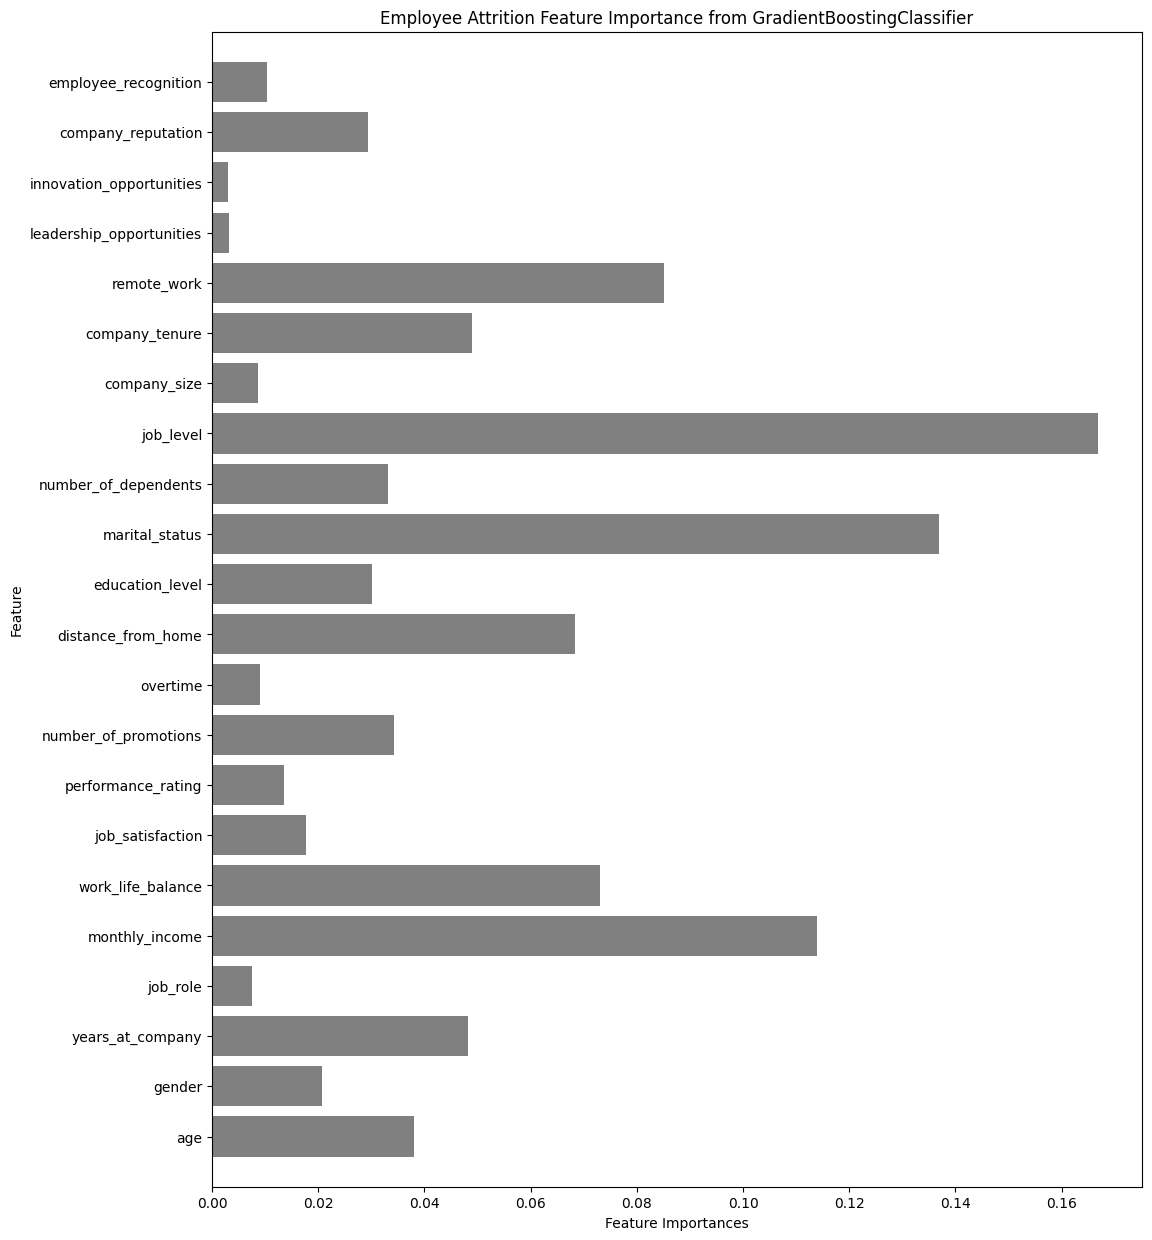

In [64]:
gbrt_model.feature_importances_
#df = pd.DataFrame({'feature':train_data.columns,'importances':gbrt_model.feature_importances_})
fig,ax = plt.subplots(1,1,figsize=(12,15))
ax.barh(np.arange(len(train_data.columns)),gbrt_model.feature_importances_,align='center',color='grey')
ax.set_yticks(np.arange(len(train_data.columns)),train_data.columns)
ax.set_xlabel('Feature Importances')
ax.set_ylabel('Feature')
ax.set_ylim(-1,len(train_data.columns))
ax.set_title('Employee Attrition Feature Importance from GradientBoostingClassifier')
plt.show()

<h3>5)-2 GradientBoostingClassifier Accuracy</h3>

In [74]:
pred = gbrt_model.predict(test_data)
#accuracy_score(test_data,pred)
accuracy_score(test_label,pred)

0.7593288590604027

<h3>6) Random Forest Classifier</h3>

In [78]:
forest_model = RandomForestClassifier(n_estimators=200)
forest_model.fit(train_data,train_label)
print("Test score: {:2f}".format(forest_model.score(test_data,test_label)))


Test score: 0.747718


<h3>6)-1 Random Forest Classifier with scaler</h3>

In [44]:
forest_model = RandomForestClassifier(n_estimators=100,random_state=0)
scaler = MinMaxScaler(copy=True,feature_range=(0,1))
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)
forest_model.fit(train_data,train_label)
print("Test score: {:2f}".format(forest_model.score(test_data,test_label)))

Test score: 0.746242


<h3>6)-2 Random Forest Classifier Feature Importance</h3>

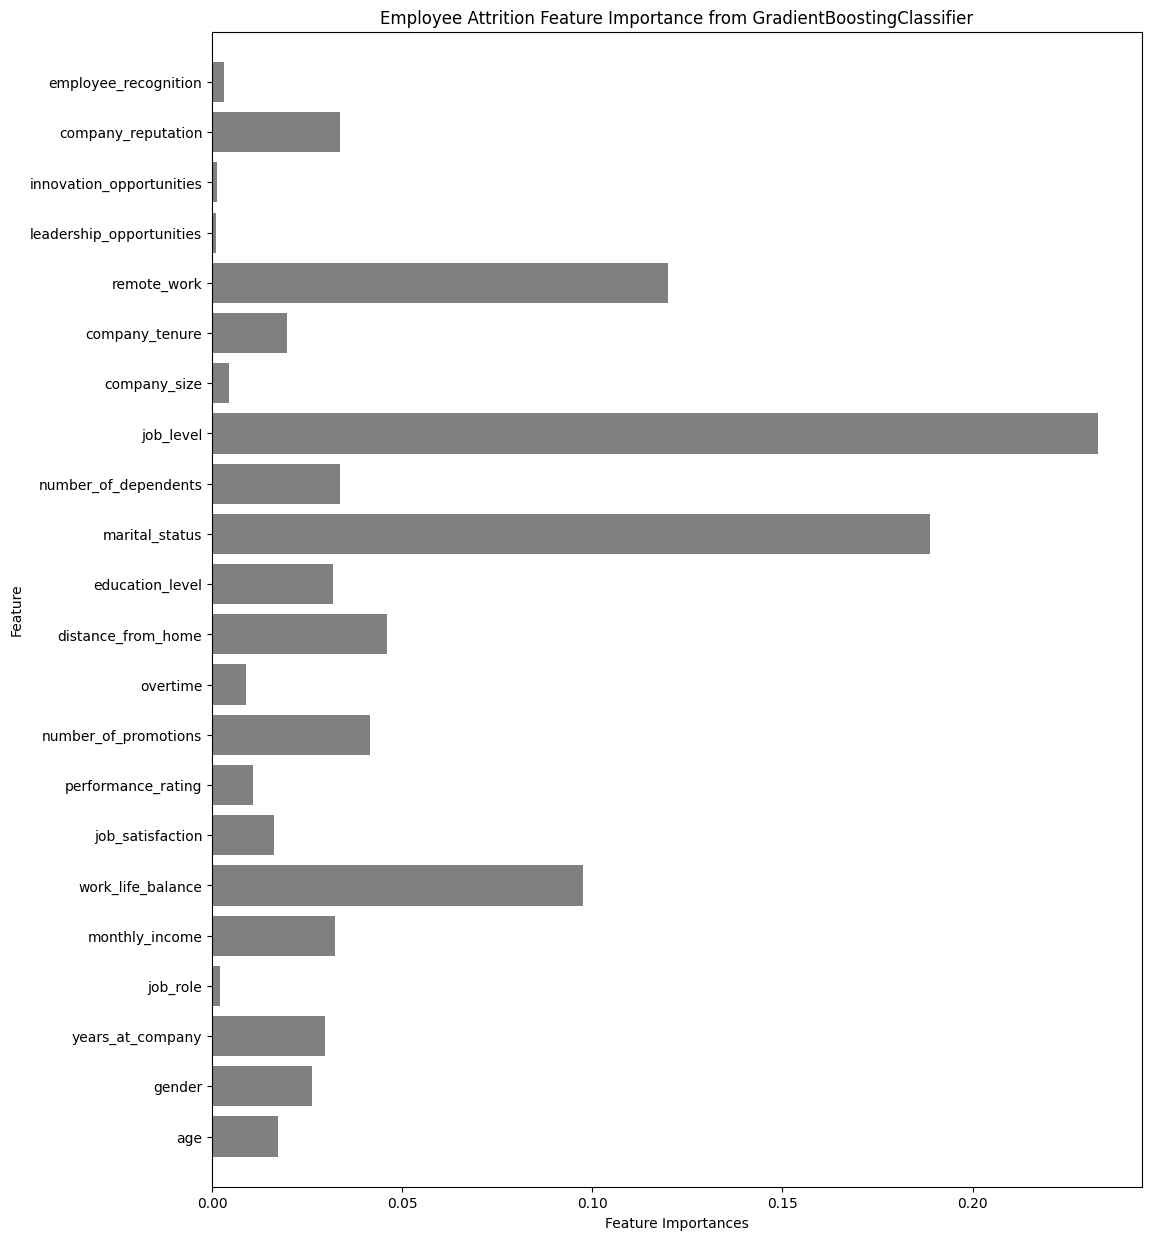

In [59]:
forest_model.feature_importances_
#df = pd.DataFrame({'feature':train_data.columns,'importances':gbrt_model.feature_importances_})
fig,ax = plt.subplots(1,1,figsize=(12,15))
ax.barh(np.arange(len(train_data.columns)),gbrt_model.feature_importances_,align='center',color='grey')
ax.set_yticks(np.arange(len(train_data.columns)),train_data.columns)
ax.set_xlabel('Feature Importances')
ax.set_ylabel('Feature')
ax.set_ylim(-1,len(train_data.columns))
ax.set_title('Employee Attrition Feature Importance from GradientBoostingClassifier')
plt.show()

<h2>3. Feature Selection</h2>

<h3>1) SelectFromModel, Random Forest Classifier</h3>

X_train.shape: (59598, 22)
X_train_l1.shape: (59598, 11)


([], [])

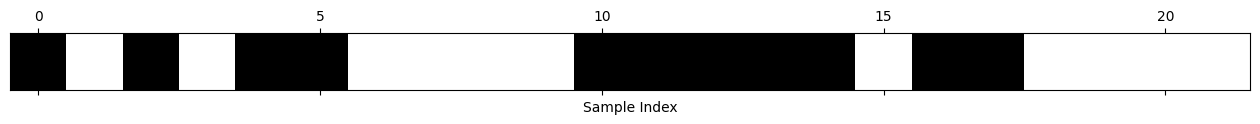

In [86]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold='median')
select.fit(train_data,train_label)
x_train_l1 = select.transform(train_data)
print("X_train.shape: {}".format(train_data.shape))
print("X_train_l1.shape: {}".format(x_train_l1.shape))
mask = select.get_support()
#visualize mask -- black is True, white is False
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())

In [90]:
x_test = select.transform(test_data)
score = GradientBoostingClassifier().fit(x_train_l1,train_label).score(x_test,test_label)
#score = LogisticRegression().fit(x_train_l1,train_label).score(x_test,test_label)
print("Test score: {:.3f}".format(score))

Test score: 0.742


<h3>2) Recursive Feature Elimination, Random Forest Classifier</h3>

([], [])

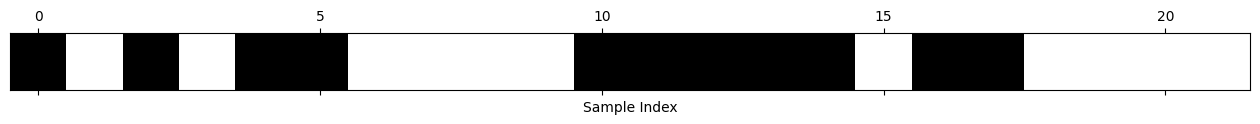

In [93]:
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=11)
select.fit(train_data,train_label)
#visualize the selected feature
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())